### By: AkshatKumar Nigam, Robert Pollice, Mario Krenn, Gabriel dos Passos Gomes, and Alan Aspuru-Guzik

Paper Link: https://doi.org/10.26434/chemrxiv.13383266.v2 \
Paper Github: https://github.com/aspuru-guzik-group/stoned-selfies 

In [1]:
import sys
import time
sys.path.append("../pystoned/")

from rdkit import Chem
from fingerprints import *
from pystoned import *

### 1. Generating the chemical subspace of Celecoxib, without any restrictions

In [2]:
smi     = 'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'   # Celecoxib
fp_type = 'ECFP4'

num_random_samples = 100     
num_mutation_ls    = [1, 2, 3, 4, 5]

In [3]:
cs = ChemicalSubspace(smiles=smi, 
                      fp_type=fp_type, 
                      num_mutation_ls=num_mutation_ls, 
                      num_random_samples=num_random_samples)

In [4]:
canon_smi_ls = cs.generate()

In [5]:
canon_smi_ls_scores = get_fp_scores(canon_smi_ls, target_smi=smi, fp_type=fp_type)

# Molecules with fingerprint similarity > 0.8
indices_thresh_8 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.8]
mols_8 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_8]

# Molecules with fingerprint similarity > 0.6
indices_thresh_6 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.6 and x < 0.8]
mols_6 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_6]

# Molecules with fingerprint similarity > 0.4
indices_thresh_4 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.4 and x < 0.6]
mols_4 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_4]

### Visualizing Molecules with Similarity > 0.8

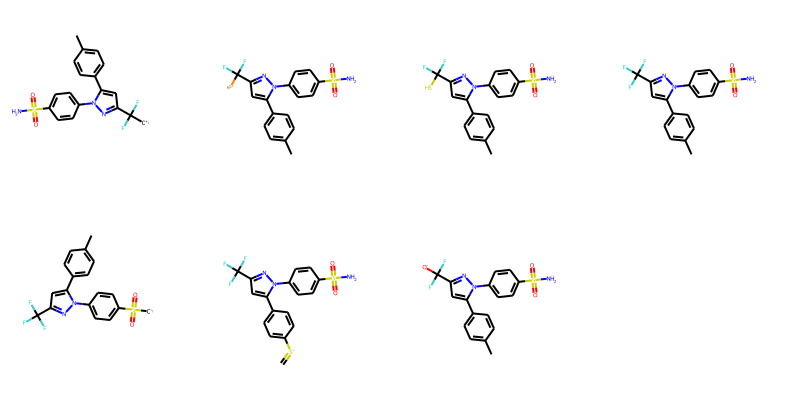

In [6]:
img=Draw.MolsToGridImage(mols_8[:8],molsPerRow=4,subImgSize=(200,200))    
img

### Visualizing Molecules with Similarity > 0.6 & Less than 0.8

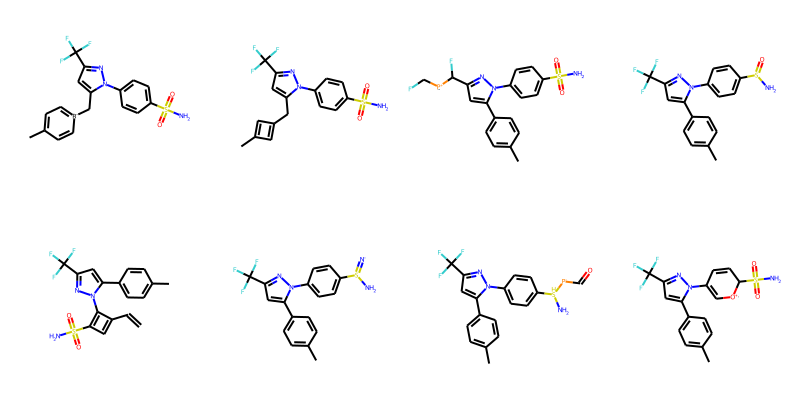

In [7]:
img=Draw.MolsToGridImage(mols_6[:8],molsPerRow=4,subImgSize=(200,200))    
img

### Visualizing Molecules with Similarity > 0.4 Less than 0.6

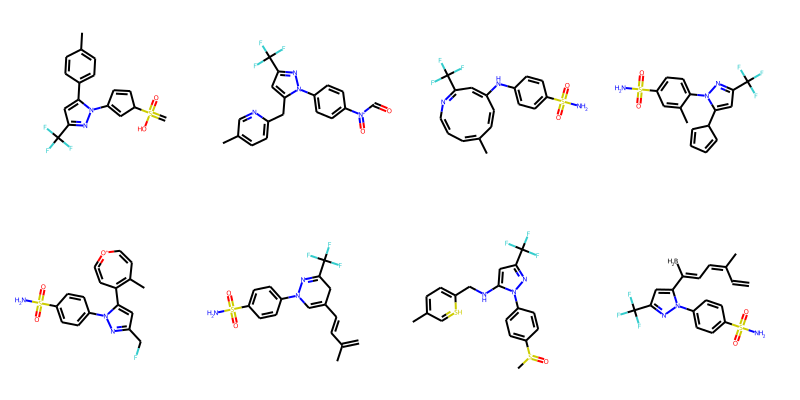

In [8]:
img=Draw.MolsToGridImage(mols_4[:8],molsPerRow=4,subImgSize=(200,200))    
img

### 3. Generating the chemical subspace of Celecoxib while preserving a specific substructure

We will preserve the structure marked in red for Celecoxib: 

<img src="https://github.com/aspuru-guzik-group/stoned-selfies/blob/main/data/struct_pres.png?raw=True" width="250" />

We write a function with RDKit that can detect the highlighted structure ( substructure_preserver ). While performing mutations with SELFIES, we check if the function returns True (has the substructure). Else, the algorithm is asked to retry/perform a different mutation. Have a look at the specific line: 
```
if len(selfie_mutated_chars) > max_molecules_len or smiles_canon=="" or substructure_preserver(mol)==False:
```

In [9]:
smi     = 'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'   # Celecoxib
smi_sub = 'NS(=O)(=O)c1ccc(-n2cccn2)cc1'
fp_type = 'ECFP4'

num_random_samples = 100     
num_mutation_ls    = [1, 2, 3, 4, 5]

In [10]:
cs = ChemicalSubspace(smiles=smi, 
                      fp_type=fp_type, 
                      num_mutation_ls=num_mutation_ls, 
                      num_random_samples=num_random_samples,
                      preserve_substructure_smiles=smi_sub)

In [11]:
canon_smi_ls = cs.generate()

In [12]:
canon_smi_ls_scores = get_fp_scores(canon_smi_ls, target_smi=smi, fp_type=fp_type)

# Molecules with fingerprint similarity > 0.8
indices_thresh_8 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.8]
mols_8 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_8]

# Molecules with fingerprint similarity > 0.6
indices_thresh_6 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.6 and x < 0.8]
mols_6 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_6]

# Molecules with fingerprint similarity > 0.4
indices_thresh_4 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.4 and x < 0.6]
mols_4 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_4]

### Visualizing Molecules with Similarity > 0.8

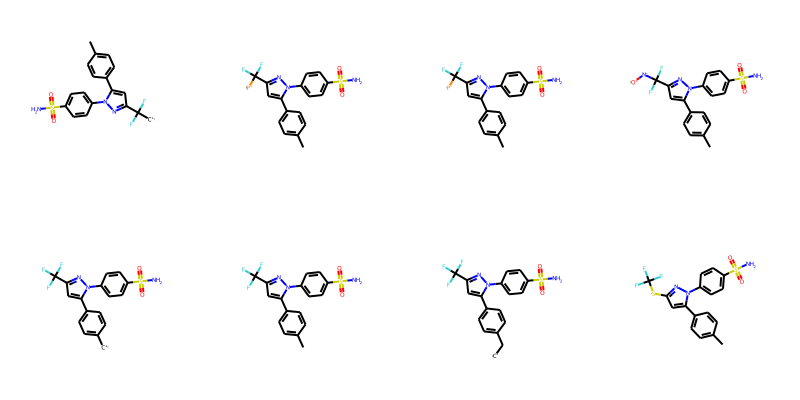

In [13]:
img=Draw.MolsToGridImage(mols_8[:8],molsPerRow=4,subImgSize=(200,200))    
img

### Visualizing Molecules with Similarity > 0.6 & Less than 0.8

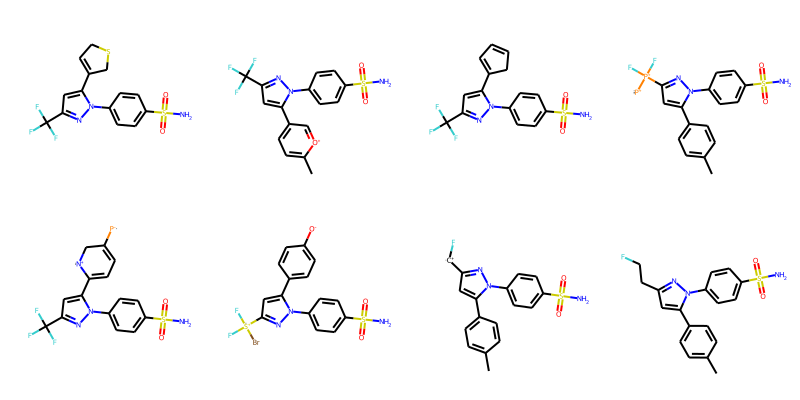

In [14]:
img=Draw.MolsToGridImage(mols_6[:8],molsPerRow=4,subImgSize=(200,200))    
img

### Visualizing Molecules with Similarity > 0.4 Less than 0.6

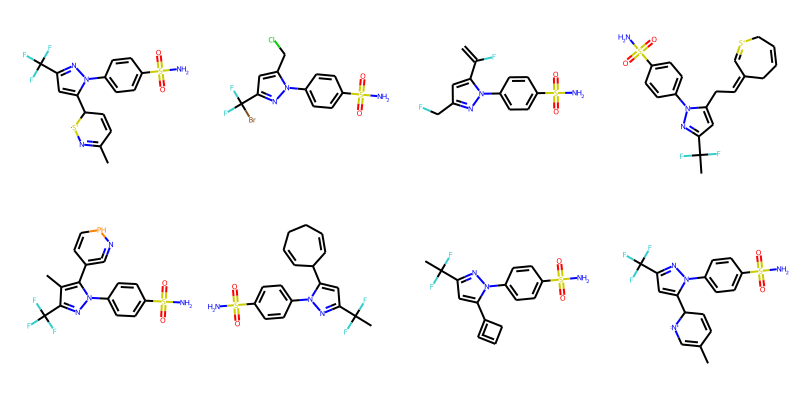

In [15]:
img=Draw.MolsToGridImage(mols_4[:8],molsPerRow=4,subImgSize=(200,200))    
img

# Chemical Path Formation: 

## Analyzing QED & LogP values for a Chemical Path between Tadalafil & Sildenafil: 
The get_compr_paths() function generates multiple chemical paths between two input SMILES. 

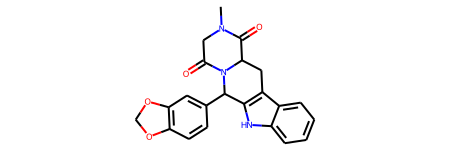

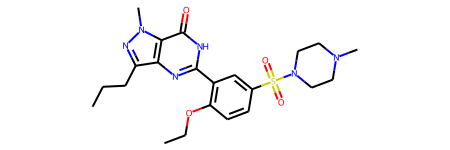

0.6925587527204076 0.5534046105187581
2.2113000000000005 1.6109


In [16]:
from rdkit.Chem import Descriptors

def get_logP(mol):
    '''Calculate logP of a molecule 
    
    Parameters:
    mol (rdkit.Chem.rdchem.Mol) : RdKit mol object, for which logP is to calculates
    
    Returns:
    float : logP of molecule (mol)
    '''
    return Descriptors.MolLogP(mol)

starting_smile = 'CN1CC(=O)N2C(C1=O)CC3=C(C2C4=CC5=C(C=C4)OCO5)NC6=CC=CC=C36'       # Tadalafil
target_smile   = 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C' # Sildenafil 

mol_starting = Chem.MolFromSmiles(starting_smile)
mol_target   = Chem.MolFromSmiles(target_smile)

qed_starting = Chem.QED.qed(mol_starting)
qed_target   = Chem.QED.qed(mol_target)

logP_starting = get_logP(mol_starting)
logP_target   = get_logP(mol_target)

display(mol_starting, mol_target)
print(qed_starting, qed_target)
print(logP_starting, logP_target)

In [17]:
num_tries = 2
num_random_samples = 2
collect_bidirectional = True
fp_type = "ECFP4"

cp = ChemicalPath(starting_smiles=starting_smile,
                  target_smiles=target_smile,
                  num_tries=num_tries,
                  num_random_samples=num_random_samples,
                  collect_bidirectional=collect_bidirectional,
                  fp_type=fp_type)

In [18]:
smiles_paths_dir1, smiles_paths_dir2 = cp.generate()

In [19]:
# Find the median molecule & plot: 
all_smiles_dir_1 = [item for sublist in smiles_paths_dir1 for item in sublist] # all the smile string of dir1
all_smiles_dir_2 = [item for sublist in smiles_paths_dir2 for item in sublist] # all the smile string of dir2

all_smiles = all_smiles_dir_1 + all_smiles_dir_2
logP_path  = [get_logP(Chem.MolFromSmiles(x)) for x in all_smiles]
QED_path   = [Chem.QED.qed(Chem.MolFromSmiles(x)) for x in all_smiles]
    
scores_start  = get_fp_scores(all_smiles, starting_smile, fp_type)   # similarity to target
scores_target = get_fp_scores(all_smiles, target_smile, fp_type)     # similarity to starting structure
data          = np.array([scores_target, scores_start])
avg_score     = np.average(data, axis=0)
better_score  = avg_score - (np.abs(data[0] - data[1]))   
better_score = ((1/9) * better_score**3) - ((7/9) * better_score**2) + ((19/12) * better_score)

In [20]:
# Filter based on better score: 
apply_score_threshold = False 
if apply_score_threshold: 
    indices_threshold = []
    for i in range(len(better_score)): 
        if better_score[i] >= -20: # 0.2 = if required, Threshold! 
            indices_threshold.append(i)
            
    all_smiles = [all_smiles[i] for i in indices_threshold]
    logP_path  = [get_logP(Chem.MolFromSmiles(x)) for x in all_smiles]
    QED_path   = [Chem.QED.qed(Chem.MolFromSmiles(x)) for x in all_smiles]

    scores_start  = get_fp_scores(all_smiles, starting_smile)   # similarity to target
    scores_target = get_fp_scores(all_smiles, target_smile)     # similarity to starting structure
    data          = np.array([scores_target, scores_start])
    avg_score     = np.average(data, axis=0)
    better_score  = avg_score - (np.abs(data[0] - data[1]))   
    better_score = ((1/9) * better_score**3) - ((7/9) * better_score**2) + ((19/12) * better_score)

print('Min {} Max {}'.format(min(better_score), max(better_score)))

Min -0.42633599999999994 Max 0.24257611162499995


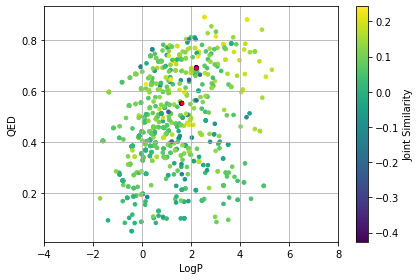

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
sc = ax.scatter(logP_path, QED_path, c=better_score.tolist(), cmap=cm, s=13) 
clb = plt.colorbar(sc)

sc = ax.plot([logP_starting, logP_target], [qed_starting, qed_target], 'o', c='red', markersize=3, linewidth=3) # TARGETS 

clb.set_label('Joint Similarity', fontsize=10)
ax.set_xlabel('LogP', fontsize=10)
ax.set_ylabel('QED', fontsize=10)
plt.xlim([-4, 8])

ax.grid(True)
fig.tight_layout()

plt.show()

In [22]:
# random generate
def get_selfie_chars(selfie):
    '''Obtain a list of all selfie characters in string selfie
    
    Parameters: 
    selfie (string) : A selfie string - representing a molecule 
    
    Example: 
    >>> get_selfie_chars('[C][=C][C][=C][C][=C][Ring1][Branch1_1]')
    ['[C]', '[=C]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[Branch1_1]']
    
    Returns:
    chars_selfie: list of selfie characters present in molecule selfie
    '''
    chars_selfie = [] # A list of all SELFIE sybols from string selfie
    while selfie != '':
        chars_selfie.append(selfie[selfie.find('['): selfie.find(']')+1])
        selfie = selfie[selfie.find(']')+1:]
    return chars_selfie

alphabet = list(selfies.get_semantic_robust_alphabet()) # 34 SELFIE characters 
max_len_random_struct = max([len(get_selfie_chars(encoder(starting_smile))), len(get_selfie_chars(encoder(target_smile)))])
min_len_random_struct = min([len(get_selfie_chars(encoder(starting_smile))), len(get_selfie_chars(encoder(target_smile)))])
num_samples = len(logP_path)
random_selfies = []

for _ in range(num_samples): 
    selfie = ''

    for i in range(random.randint(min_len_random_struct, max_len_random_struct)): # max_molecules_len = max random selfie string length 
        selfie = selfie + np.random.choice(alphabet, size=1)[0]
    random_selfies.append(selfie)
    
random_smiles = [decoder(x) for x in random_selfies]
scores_start_rnd  = get_fp_scores(random_smiles, starting_smile, fp_type)   # similarity to target
scores_target_rnd = get_fp_scores(random_smiles, target_smile, fp_type)     # similarity to starting structure
data_rnd          = np.array([scores_target_rnd, scores_start_rnd])
avg_score_rnd     = np.average(data_rnd, axis=0)
better_score_random  = avg_score_rnd - (np.abs(data_rnd[0] - data_rnd[1]))   

better_score_random = ((1/9) * better_score_random**3) - ((7/9) * better_score_random**2) + ((19/12) * better_score_random)

logP_path_random  = [get_logP(Chem.MolFromSmiles(x)) for x in random_smiles]
QED_path_random   = [Chem.QED.qed(Chem.MolFromSmiles(x)) for x in random_smiles]

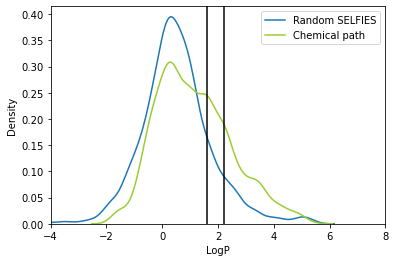

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


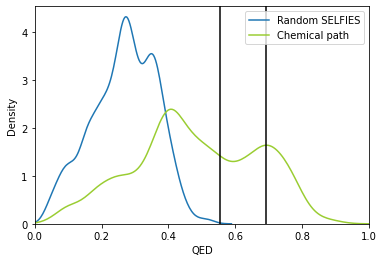

In [23]:
import seaborn as sns

# DISTRIBUTION PLOTS! 
A = sns.kdeplot(logP_path_random, bw_method=0.2, label="Random SELFIES")
A = sns.kdeplot(logP_path, bw_method=0.2, label="Chemical path", color='yellowgreen')

plt.axvline(logP_starting, 0, 1.0, c='black') # vertical line
plt.axvline(logP_target, 0, 1.0, c='black') # vertical line


A.set_xlabel('LogP', fontsize=10)
A.set_ylabel('Density', fontsize=10)
plt.xlim([-4, 8])
plt.legend()
# plt.savefig('./final_saved/logP_distrb.svg', dpi=500)
plt.show()


B = sns.kdeplot(QED_path_random, bw=.2, label="Random SELFIES")
B = sns.kdeplot(QED_path, bw=.2, label="Chemical path", color='yellowgreen')
plt.axvline(qed_starting, 0, 1.0, c='black') # vertical line
plt.axvline(qed_target, 0, 1.0, c='black') # vertical line
B.set_xlabel('QED', fontsize=10)
B.set_ylabel('Density', fontsize=10)
plt.xlim([0, 1])
plt.legend()
plt.show()

## Obtain the best median molecules (i.e. possessing high joint similarity) for Tadalafil & Sildenafil

In [24]:
starting_smile = 'CN1CC(=O)N2C(C1=O)CC3=C(C2C4=CC5=C(C=C4)OCO5)NC6=CC=CC=C36'       # Tadalafil
target_smile   = 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C' # Sildenafil 

num_tries = 6
num_random_samples = 6
collect_bidirectional = True
fp_type = "ECFP4"
num_top_iter = 12

cp = ChemicalPath(starting_smiles=starting_smile,
                  target_smiles=target_smile,
                  num_tries=num_tries,
                  num_random_samples=num_random_samples,
                  collect_bidirectional=collect_bidirectional,
                  fp_type=fp_type)

In [25]:
# SMILES, joint-sim score
smiles_, best_scores = cp.get_median_mols(num_top_iter=num_top_iter)

In [31]:
from rdkit.Chem import rdCoordGen

mol_ = []
for smiles in smiles_:
    mol = Chem.MolFromSmiles(smiles)
    mol.RemoveAllConformers()
    rdCoordGen.AddCoords(mol)
    mol_.append(mol)

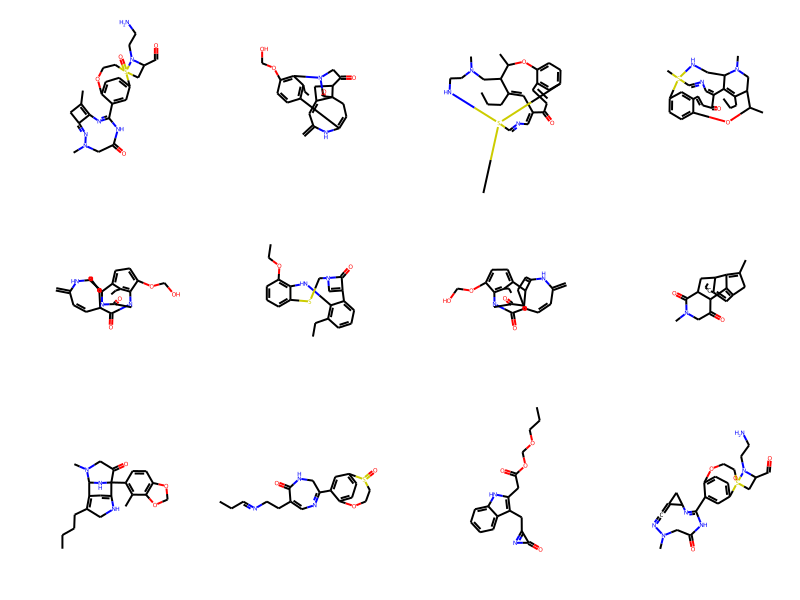

In [34]:
img = Draw.MolsToGridImage(mol_[:40], molsPerRow=4, subImgSize=(200,200))    
img